# Das Standardbeispiel für neuronale Netzwerke
## Erkennen von handgeschriebenen Ziffern
MNIST ist eine Datenbank, in der zehntausende handgeschriebene Zahlen eingescannt und bezeichnet sind. Diese Daten eignen sich zum Trainieren und Testen von neuronalen Netzwerken

[Link zum Wiki](https://de.wikipedia.org/wiki/MNIST-Datenbank)<br>
[Link zur Datenbank](https://yann.lecun.com/exdb/mnist/)

In [2]:
import  mnist_loader
from matplotlib import pyplot as plt
import network
import numpy as np

In [3]:
training_data,validation_data,test_data = mnist_loader.load_data_wrapper()

In [4]:
training_data=list(training_data)
validation_data=list(validation_data)
test_data=list(test_data)

In [5]:
print(len(training_data))
print(len(validation_data))
print(len(test_data))
print(training_data[0])

50000
10000
10000
(array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.     

Aus der Dokumentation der MNIST-Datenbank kann man erfahren, dass die Ziffern als 28x28 Graustufenbilder gespeichert sind.

**Erste Aufgabe:** Mache Beispiele der Trainingsdaten und deren Label sichtbar. Gib zum Beispiel 10 zufällige Datenbeispiele aus. (Warnung: Das resizing zerstört die Daten. Zum Netzwerktraining Daten neu laden.)

In [6]:
i=24
print(training_data[i])
#print(training_data[i][1])
#training_data[i][0].resize(28,28)
# print(training_data[i][0])

(array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.  

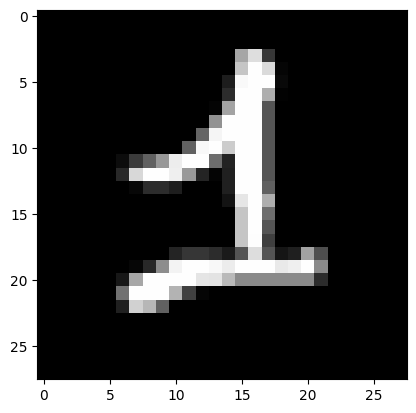

label:
 [[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [25]:
plt.imshow(training_data[i][0], cmap='gray', vmin=0, vmax=1)
plt.show()
print("label:\n",training_data[i][1])

**Zweite Aufgabe:** Schreibe eine kleine Funktion, die statt des Arrays, die entsprechende Ziffer zurückgibt.

In [19]:
def label(array):
    for i in range(10):
        if array[i]==1:
            return i

In [20]:
label(training_data[i][1])

5

## Erstellung eines Netzwerks, Training und Test
Ihr werdet gleich im Video sehen, was ein neuronales Netzwerk ist. Für den Moment ist es eine Black-Box, die 28x28=784 Grauwerte einliest und eine Zahl zwischen 0 und 9 wieder ausspuckt. Dafür benötigt das Netzwerk 784 Eingänge und 10 Ausgänge. Zusätzlich fügen wir noch 30 interne Gehirnzellen hinzu, die das Netzwerk komplexer und leistungsfähiger machen.

In [29]:
net = network.Network([784,30,10])
net.SGD(training_data, epochs = 3,mini_batch_size= 10,eta = 3.0, test_data=test_data)

Epoch 0 : 8195 / 10000
Epoch 1 : 8372 / 10000
Epoch 2 : 8425 / 10000


Wir testen einfach mal, wie gut das Netzwerk unsere Zahlen erkennen kann.

In [30]:
net.evaluate(validation_data)

8524

In [31]:
# Finde Falschklassifizierungen
for i in range(0,400):
    ergebnis = np.argmax(net.feedforward(training_data[i][0]))
    lbl  = label(training_data[i][1])
    if ergebnis!=lbl:
        print(i,ergebnis,lbl)

4 5 9
19 8 9
22 4 9
24 2 1
28 7 2
33 7 9
43 8 9
45 5 9
48 3 9
54 4 9
57 5 9
80 0 9
87 7 9
109 4 2
110 4 9
116 5 9
132 3 5
133 5 9
134 3 1
138 0 5
140 3 7
148 8 7
153 8 9
154 7 9
162 4 9
167 7 9
170 7 9
172 7 9
176 7 9
178 6 2
180 1 2
183 5 9
195 5 9
226 3 9
227 7 9
247 4 9
250 6 3
254 5 3
262 0 2
264 4 9
267 8 9
268 7 2
278 6 5
280 5 9
282 7 9
285 8 9
304 7 9
313 8 9
319 5 9
322 4 9
334 4 9
344 4 9
346 3 9
350 8 9
362 7 9
364 8 9
370 1 7
374 4 9
383 7 9
384 4 7
389 5 9
391 3 2


In [23]:
net.feedforward(training_data[25][0])

array([[1.67393388e-03],
       [2.84248070e-05],
       [8.00826586e-01],
       [9.21182049e-02],
       [1.83737242e-07],
       [3.90939506e-05],
       [1.55674045e-03],
       [2.82683740e-09],
       [1.99770595e-02],
       [4.27238071e-07]])